In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
connection = sqlite3.connect('data/jobs.db')

In [2]:
df = pd.read_sql("""
    SELECT
        *
    FROM
        jobs    """,con=connection)
df

,job_id,job_role,job_role_ext,post_title,post_url,company_name,company_url,country,location,job_type,salary,scrape_date,posted,info_remote,post_language,description
0,4cee71852246cd98,de,data engineer,Data Engineer (Remote),https://www.indeed.com/viewjob?jk=4cee71852246...,Collins Aerospace,https://www.indeed.com/cmp/Collins-Aerospace?c...,us,"Charlotte, NC",Full-time,None,2022-04-23,Posted Just posted,"Collins Aerospace - 3,129 reviews - Charlotte,...",en,\n\n\nCollins Aerospace is continuing to grow ...
1,245d0d6e3a8680e5,de,data engineer,Senior Staff Data Engineer - 100% Remote,https://www.indeed.com/viewjob?jk=245d0d6e3a86...,Stryker,https://www.indeed.com/cmp/Stryker-3?campaigni...,us,Illinois,None,None,2022-04-23,Posted today,"Stryker - 1,808 reviews - Illinois - Remote",en,Why join Stryker?\n\nWe are proud to be named ...
2,76031179131b0858,de,data engineer,SAP Data Engineer (Remote),https://www.indeed.com/viewjob?jk=76031179131b...,Collins Aerospace,https://www.indeed.com/cmp/Collins-Aerospace?c...,us,"Charlotte, NC",Full-time,None,2022-04-23,Posted Just posted,"Collins Aerospace - 3,129 reviews - Charlotte,...",en,\n\nCollins Aerospace is continuing to grow ou...
3,04f7fde92feb9b76,de,data engineer,Azure Data Engineer,https://www.indeed.com/viewjob?jk=04f7fde92feb...,The Coca-Cola Company,https://www.indeed.com/cmp/The-Coca--cola-Comp...,us,"Atlanta, GA 30313",Full-time,None,2022-04-23,Posted Just posted,"The Coca-Cola Company - 9,868 reviews - Atlant...",en,\n\n...\n Our Purpose and Growth Culture: We a...
4,a3510f5979c22922,de,data engineer,Lead Data Engineer - High Performance Computin...,https://www.indeed.com/viewjob?jk=a3510f5979c2...,TARGET,https://www.indeed.com/cmp/Target?campaignid=m...,us,"Sunnyvale, CA 94086",Full-time,None,2022-04-23,Posted today,"TARGET - 59,853 reviews - Sunnyvale, CA 94086 ...",en,\n\nAbout us:\n As a Fortune 50 company with m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,d084dd2d6b21eeb2,ds,data scientist,Data Scientist,https://www.indeed.com/viewjob?jk=d084dd2d6b21...,Halian,https://www.indeed.com/cmp/Halian?campaignid=m...,ae,UAE,Permanent,None,2022-04-25,Posted Today,Halian - UAE,en,\n\n\n Our client is a respected and recogni...
1329,428b2744286bfeda,ds,data scientist,Data Scientist II,https://www.indeed.com/viewjob?jk=428b2744286b...,RELX,https://www.indeed.com/cmp/Relx?campaignid=mob...,uy,Departamento de Río Negro,None,None,2022-04-25,Posted today,RELX - Departamento de Río Negro,en,O profissional contratado para essa posição ir...
1330,2629e9c0b6481cc6,ds,data scientist,Data Scientist II,https://www.indeed.com/viewjob?jk=2629e9c0b648...,Risk Solutions,https://www.indeed.com/cmp/Relx-Group?campaign...,uy,Departamento de Río Negro,None,None,2022-04-25,Posted today,Risk Solutions - 106 reviews - Departamento de...,en,O profissional contratado para essa posição ir...
1331,d6022dd31205e47b,ds,data scientist,Data Scientist (Recommendation/NLP/...),https://www.indeed.com/viewjob?jk=d6022dd31205...,VNG Corporation,https://www.indeed.com/cmp/Vng-Corporation?cam...,vn,Thành phố Hồ Chí Minh,None,None,2022-04-25,Posted today,VNG Corporation - Thành phố Hồ Chí Minh,en,Data Scientist (Recommendation/NLP/...)\nVNG C...


In [3]:
from wordcloud import WordCloud

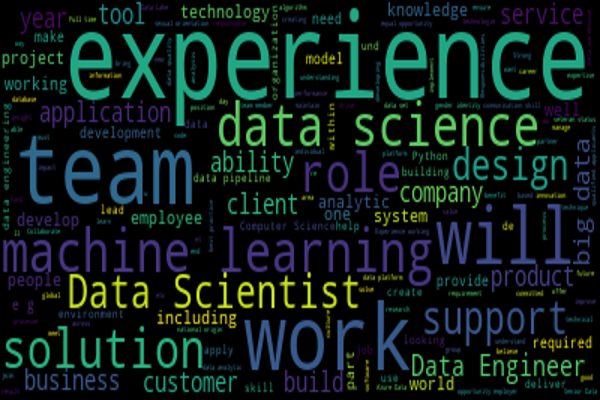

In [50]:
df = pd.read_sql("SELECT description FROM jobs",con=connection)
text_list = []
for index,row in df.iterrows():
    text_list.append(df.loc[index,'description'])
text = ' '.join(text_list)
wc = WordCloud().generate(text)
image = wc.to_image()
image = image.resize((600,400))
image

,company_name,posts
0,IBM,52
1,Comcentric,43
2,"JPMorgan Chase Bank, N.A.",31
3,Shopify,30
4,Deloitte,28
5,NielsenIQ,12
6,Visa,11
7,General Motors,11
8,Zoom,10
9,Experfy Inc,10


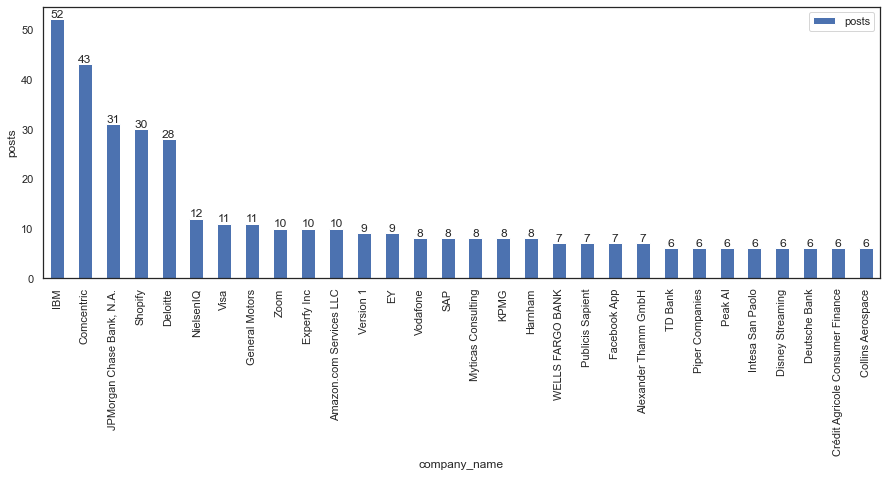

In [50]:
df = pd.read_sql("""
    SELECT
        company_name,
        COUNT(*) AS posts
    FROM
        jobs
    GROUP BY
        company_name
    ORDER BY
        COUNT(*) desc
    LIMIT
        30    """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
ax = df.plot(kind='bar', x='company_name', ylabel='posts', figsize=(15,5))
for container in ax.containers:
    ax.bar_label(container)
df

,de_posts,ds_posts
0,590,474


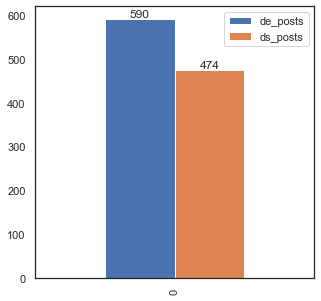

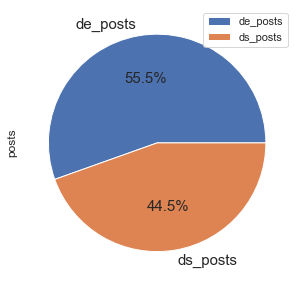

In [75]:
df = pd.read_sql("""
    SELECT
        SUM(CASE WHEN job_role='de' THEN 1 ELSE 0 END) AS de_posts,
        SUM(CASE WHEN job_role='ds' THEN 1 ELSE 0 END) AS ds_posts
    FROM
        jobs    """,con=connection)

sns.set_theme('notebook')
sns.set_style('white')

ax = df.plot(kind='bar', figsize=(5,5)) # use ax to then plot values
for container in ax.containers:
    ax.bar_label(container)
df[['de_posts','ds_posts']].T.plot(kind='pie', y=0, ylabel='posts', autopct='%1.1f%%', figsize=(5,5), fontsize=15) # Transpose and plot
df

,country,total_posts,de_posts,ds_posts
0,us,500,245,255
1,in,123,89,34
2,de,71,44,27
3,uk,61,40,21
4,ca,48,25,23
5,fr,46,24,22
6,nl,21,11,10
7,it,16,9,7
8,se,14,8,6
9,pl,14,11,3


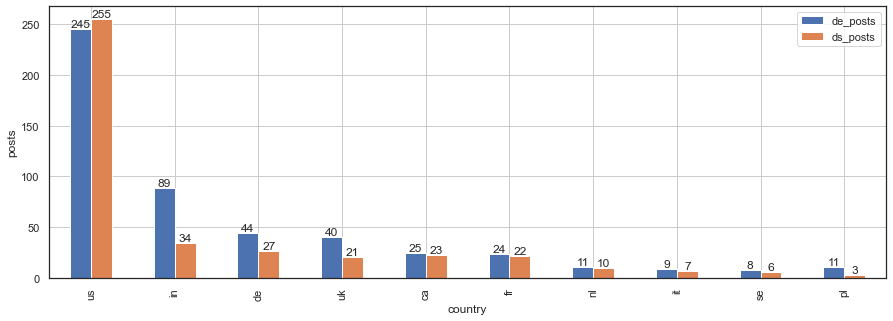

In [67]:
df = pd.read_sql("""
    SELECT
        country,
        COUNT(*) AS total_posts,
        SUM(CASE WHEN job_role='de' THEN 1 ELSE 0 END) AS de_posts,
        SUM(CASE WHEN job_role='ds' THEN 1 ELSE 0 END) AS ds_posts
    FROM
        jobs
    GROUP BY
        country
    ORDER BY
        count(*) DESC
    LIMIT
        10   """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
ax = df[['country','de_posts','ds_posts']].plot(kind='bar', x='country', figsize=(15,5), ylabel='posts', grid=True)
for container in ax.containers:
    ax.bar_label(container)
df

In [4]:
df = pd.read_sql("""
    SELECT
        scrape_date,
        COUNT(*)
    FROM
        jobs
    GROUP BY
        scrape_date
    ORDER BY
        count(*) DESC   """,con=connection)
df

,scrape_date,COUNT(*)
0,2022-04-23,928
1,2022-04-24,136


job_role_ext,data engineer,data scientist
sql_percentage,75.3,63.9
python_percentage,66.4,84.9
cloud_percentage,60.4,28.2
airflow_percentage,16.4,3.7


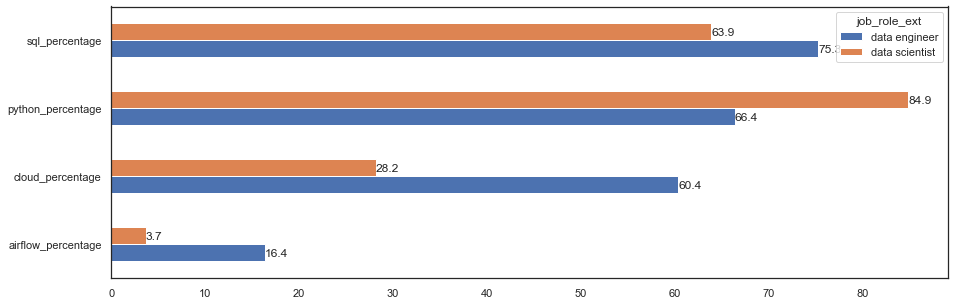

In [119]:
df = pd.read_sql("""
    SELECT
        job_role_ext,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%SQL%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS sql_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%PYTHON%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS python_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%AIRFLOW%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS airflow_percentage,
        ROUND(SUM(CASE
            WHEN UPPER(description) LIKE '%AWS%' OR
            UPPER(description) LIKE '%GCP%' OR 
            UPPER(description) LIKE '%AZURE%' THEN 1
            ELSE 0
            END) / CAST(COUNT(*) AS float)*100, 1) AS cloud_percentage
    FROM
        jobs
    GROUP BY
        job_role_ext
    ORDER BY
        2 DESC
    LIMIT
        10   """,con=connection)
sns.set_theme('notebook')
sns.set_style('white')
df = df.set_index('job_role_ext').T.sort_values(by=['data engineer'], ascending=False) # Transpose to graph better
ax = df.sort_values(by=['data engineer']).plot(kind='barh', figsize=(15,5)) # sort back and print
for container in ax.containers:
    ax.bar_label(container)
df

In [29]:
connection.close()

wordcloud!!! and graphs. world map